In [136]:
import numpy as np
import os
import requests
import json
from datetime import date,timedelta,datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Exercício 1. Escreva uma função cuja entrada sejam duas matrizes, A e B, e a saída seja a matriz
resultante do produto das entradas. Não utilize nenhuma função de multiplicação de matrizes
pronta, faça você mesmo os loops necessários para a multiplicação. Coloque uma mensagem de
erro quando o número de colunas de A não for igual ao número de linhas de B. Utilize as arrays
do numpy.

In [17]:
def multiply_matrix(matrix1,matrix2):

    #Validation
    if matrix1.shape[1] == matrix2.shape[0]:

        lines1 = matrix1.shape[0]
        columns2 = matrix2.shape[1]
        equalLen = matrix1.shape[1]

        newMatrix = np.zeros((lines1,columns2))

        for i in range(lines1):
            for j in range(columns2):
                for x in range(equalLen):
                    newMatrix[i,j] += matrix1[i,x] * matrix2[x,j] 

        return newMatrix

    else:
        raise ValueError('The # of columns of the 1st matrix is not equal to the # of lines of 2nd matrix')

array([[ 25.,  19.,  19.,  12.],
       [ 73.,  58.,  55.,  39.],
       [121.,  97.,  91.,  66.]])

Exercício 2. Crie uma função que tenha como entrada uma matriz qualquer M × N e como saída
a média e o desvio padrão dos elementos dessa matriz.

In [33]:
def operate_matrix(matrix):

    rows = matrix.shape[0]
    columns = matrix.shape[1]
    numberItems = rows * columns

    if numberItems > 0:

        itemsList = []

        for i in range(rows):
            itemsList.extend(matrix[i])

        mean = sum(itemsList)/numberItems
        diff = [(x - mean)**2 for x in itemsList]
        std = np.sqrt(sum(diff)/(numberItems - 1))

        print(
            f'For matrix \n{matrix}', 
            f'The mean is: {mean}',
            f'The Standard Deviation is: {std:.3f}',
            sep="\n")
    else:
        raise ZeroDivisionError('The matrix used is empty!')

Exercício 3. Crie uma matriz N × N de números aleatórios com valores entre −2 e 2. Utilize a
função do exercício anterior para calcular a média e o desvio padrão dos elementos dessa matriz.
O que acontece com esses valores quando N → ∞? Dica: o numpy tem uma função que gera
números aleatórios.

In [36]:
def operate_random_matrix(N):

    randomMatrix = np.random.randint(-2,2,size=(N,N))

    return operate_matrix(randomMatrix)

In [43]:
operate_random_matrix(10000)

For matrix 
[[ 1 -1 -1 ...  0 -2 -2]
 [ 1  0 -2 ...  0 -1  0]
 [-1  0  1 ...  1  0 -2]
 ...
 [ 0  0 -2 ...  0 -1  0]
 [ 0 -2 -2 ... -2 -1  0]
 [-1 -2 -2 ...  1  1 -1]]
The mean is: -0.50000195
The Standard Deviation is: 1.118


In [ ]:
1.000
The mean is: -0.499954
The Standard Deviation is: 1.119 

2.000
The mean is: -0.500002
The Standard Deviation is: 1.118

5.000
The mean is: -0.49988052
The Standard Deviation is: 1.118

10.000
The mean is: -0.50000195
The Standard Deviation is: 1.118

Exercício 4. Desenvolva um programa que pede o nome e a idade do usuário (use a função input)
e imprime esses valores em um arquivo texto de saída. Depois desenvolva um programa para ler os
dados desse arquivo texto e imprimir o resultado na tela. Observação: a variável obtida a partir
da função input é sempre do tipo string. Se você quiser utilizar o valor de entrada como int ou
float você tem que fazer a conversão.


In [45]:
def  user_interview():

    name = input("What is your name?")
    age = int(input("How old are you?"))

    print(f"Hello, {name} aged {age} years.")

Exercício 5. Crie um jogo de pedra, papel e tesoura. Utilize a função input para pegar a opção do
jogador humano e utilize números aleatórios para gerar a resposta do computador. Faça primeiro
um jogo que tenha a mesma probabilidade de vitória, derrota ou empate. Depois desenvolva
um jogo em que a probabilidade do computador vencer seja maior, utilizando também números
aleatórios. Faça alguns testes.

In [142]:
def rock_paper_scissors_fair():

    print('Welcome to the Rock, Paper, Scissors game!\n')

    tryAgain = ''

    scoreUser = 0
    scoreComputer = 0

    while tryAgain == '':

        userInput = input('Please, write "rock", "paper" or "scissors", for Rock, Paper or Scissors, respectively.')\
            .lower()

        resultDic = {
            'paper':'rock',
            'rock':'scissors',
            'scissors':'paper'}

        resultList = [(k,v) for k,v in resultDic.items()]

        responseList = list(resultDic.keys())
        numberResponses = len(responseList)

        if userInput in responseList:

            randomResponse = responseList[np.random.randint(0,numberResponses)]

            for i in range(numberResponses):

                if set([userInput,randomResponse]) == set(resultList[i]):
                
                    if userInput == resultList[i][0]:
                        print('You won!')
                        scoreUser += 1

                    else:
                        print('You lost!')
                        scoreComputer += 1

                else:
                    print(f'Draw!')

            print(
                f'\nYou played: {userInput.title()}',
                f'The computer played: {randomResponse.title()}\n',
                f'Your score: {scoreUser}',
                f"Computer's score: {scoreComputer}\n",
                sep="\n")
            
            tryAgain = input('Do you want to play again? Press ENTER to continue')

            os.system('CLS')

        else:
            print('Your input is not valid! Please try again\n')

In [ ]:
def rock_paper_scissors_unfair():

    print('Welcome to the Rock, Paper, Scissors game!\n')

    tryAgain = ''

    scoreUser = 0
    scoreComputer = 0

    while tryAgain == '':

        userInput = input('Please, write "rock", "paper" or "scissors", for Rock, Paper or Scissors, respectively.')\
            .lower()

        # dictionary keys are the winning choice
        resultDic = {
            'rock':'paper',
            'scissors':'rock',
            'paper':'scissors'}
        
        responseList = list(resultDic.keys())
        resultList = [(k,v) for k,v in resultDic.items()]

        if userInput in responseList:

            if np.random.randint(0,11) % 2 == 0:
                
                randomResponse = resultDic[userInput]

            else:

                randomResponse = responseList[np.random.randint(0,len(responseList))]

            for i in range(3):

                if set([userInput,randomResponse]) == set(resultList[i]):
                
                    if userInput == resultList[i][1]:
                        print('You won!')
                        scoreUser += 1

                    else:
                        print('You lost!')
                        scoreComputer += 1

                else:
                    print(f'Draw!')

            print(
                f'\nYou played: {userInput.title()}',
                f'The computer played: {randomResponse.title()}\n',
                f'Your score: {scoreUser}',
                f"Computer's score: {scoreComputer}\n",
                sep="\n")
            
            tryAgain = input('Do you want to play again? Press ENTER to continue')

            os.system('CLS')

        else:
            print('Your input is not valid! Please try again\n')

Exercício 6. Faça um gráfico com o valor do dólar comercial nos últimos 20 dias. Utilize pontos
e linhas. Personalize o seu gráfico

In [235]:
def dollar_graph(numberDays):

    def timestamp_to_date(row):

        date = datetime.strptime(row['dataHoraCotacao'].split(' ')[0], '%Y-%m-%d')

        return str(datetime.strftime(date,'%d-%m-%y'))

    endDate = date.today()
    startDate = endDate - timedelta(days = numberDays)

    startDate = str(datetime.strftime(startDate, '%m-%d-%Y'))
    endDate = str(datetime.strftime(endDate, '%m-%d-%Y'))

    req = requests.get(f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='{startDate}'&@dataFinalCotacao='{endDate}'&$format=json&$select=cotacaoCompra,dataHoraCotacao")

    df = pd.json_normalize(req.json()['value'])

    df['date'] = df.apply(timestamp_to_date, axis=1)

    df.drop(labels=['dataHoraCotacao'],axis = 1,inplace=True)

    fig, axes = plt.subplots(figsize = (15,5))

    sns.set_theme(style="whitegrid")

    sns.lineplot(data = df, x = 'date',y = 'cotacaoCompra',color = '#a7c957',linewidth = 2)

    plt.axvline(
    x = '31-10-22',
    color = "#bc4749",
    label = "Elections", 
    linestyle = '--', 
    linewidth = 2)

    axes.xaxis.set_major_locator(MaxNLocator(10)) 
    axes.yaxis.set_major_formatter('$ {x:1.2f}')

    plt.legend(fontsize = 14)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel('')
    plt.ylabel('')

    plt.title(
        f'USD to BRL last {numberDays} days', 
        fontsize = 16, 
        y = 1.02,
        x = 0.1)

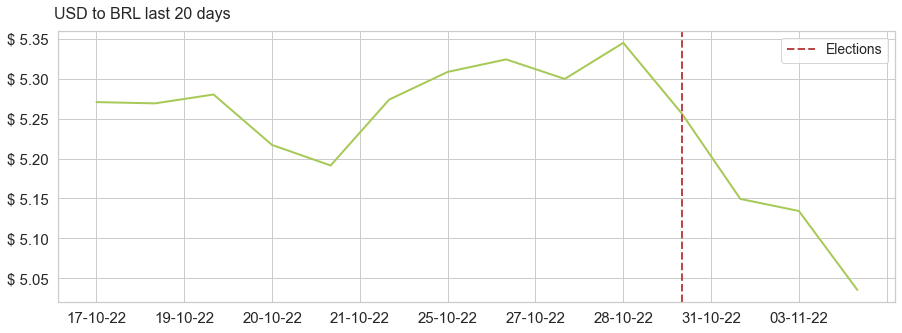

In [236]:
dollar_graph(20)